
# **Task 1 : Prediction using Supervised ML**

##  *Problem Statement* : 
         1. Predict the percentage of an student based on the no. of study hours.
         2. What will be predicted score if a student studies for 9.25 hrs/day?
         
### *Submitted by* : **VIVEKANAND MAURYA**
   

In [ ]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Data is used from the link given below
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("*********************************************")
print("\tData is successfully imported!")
print("*********************************************")
s_data.head(10) # to display first 10 rows

*********************************************
	Data is successfully imported!
*********************************************


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# Before getting any further let's visualize our Data

s_data.shape # It returns the row and column of our dataset

(25, 2)

Hence, we have total 25 rows and 2 columns in our Dataset 

In [ ]:
# Data type of our columns
s_data.dtypes

Hours     float64
Scores      int64
dtype: object

Clearly, we can see that Hours is of type: float64 i.e. float
                and Scores is of type: int64 i.e integer

Now, let's find some relationship between the data in our dataset

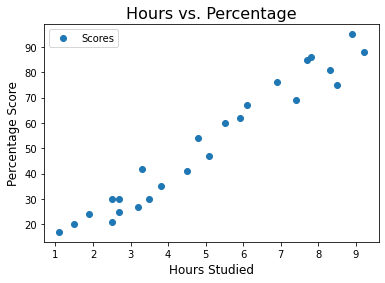

In [ ]:
# plotting Hours vs. Percentage graph

s_data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs. Percentage', size=16)
plt.xlabel('Hours Studied', size=12)
plt.ylabel('Percentage Score', size=12)
plt.show() #to display the figure

From the graph, we can clearly observe and understand that there exists a +ve linear relationship between the variables 'Hours Studied' and 'Percentage Score' which is ideal to perform Linear Regression.

### Let's Prepare the Data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
X = s_data.iloc[:, :-1].values 
y = s_data.iloc[:, 1].values

### Let's Split the Data

 We will now split this data into training and test sets. 
 
 We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

We will do this using Linear Regression technique.

    Linear Regression : Linear regression is a basic predictive analytics technique that uses historical data to predict an output variable.

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("\t****** Training is completed! ******")

	****** Training is completed! ******


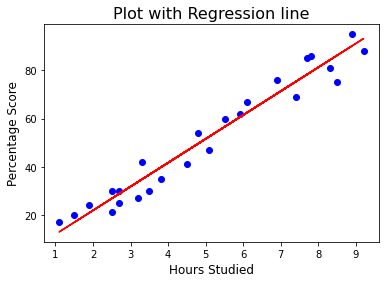

	****** Training Complete! ******


In [ ]:
# Let's plot the Regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.title('Plot with Regression line',size=16)
plt.xlabel('Hours Studied', size=12)
plt.ylabel('Percentage Score', size=12)
plt.scatter(X, y, color = 'blue')
plt.plot(X, line, color = 'red');
plt.show()

print("\t****** Training Complete! ******")

Now that we have trained our algorithm, it's time to make some predictions.

### Making Predictions

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted Scores
df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})  
df 

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Now, let's also test with our own data when :
### What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
# Given,  Hours = 9.25
hours = 9.25
own_pred = round(regressor.predict([[9.25]])[0],3)
print("*********************************************")
print("\tNo of Hours = {}".format(hours))

print("\tPredicted Score = {}".format(own_pred))
print("*********************************************")

*********************************************
	No of Hours = 9.25
	Predicted Score = 93.692
*********************************************


Hence, if a student studies for **9.25 hours** then, he is expected to score **93.692**

Finally, let's evaluate the performance of the Algorithm.

Since we are dealing with numerical data, finding Mean Absolute Error would be hingly considered to evaluate the Linear Regression model.

In [ ]:
# Calculating the accuracy of the model
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
